In [1]:
#Import Modules
import psrchive
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import chirp, find_peaks, peak_widths
from scipy.optimize import curve_fit
import scipy.optimize as opt
from scipy.cluster.vq import kmeans, vq
import scipy.stats as stats

### RFI Data

In [2]:
#Load in the raw data and transform it
a = psrchive.Archive_load('/srv/storage_11/galc/UBB/jtremblay/20220913/added_raw/B0355+54_added_raw.ar')
a.tscrunch()
a.dedisperse()
a.pscrunch()
a.remove_baseline()
data = a.get_data()
print("data shape: " + str(data.shape))

data shape: (1, 1, 4608, 1024)


In [4]:
freq_mhz_RFI_table = a.get_frequency_table()
freq_mhz_RFI = freq_mhz_RFI_table[0]
print(freq_mhz_RFI)
#freq_mhz_RFI = [item for sublist in freq_mhz_RFI_notflat for item in freq_mhz_RFI_notflat] #Flatten the list
#print(np.shape(freq_mhz_RFI))

[1940.478 1941.748 1943.017 ... 6001.731 6002.463 6003.196]


In [5]:
#Select the frequency channel to plot
all_freq_chn = data[0,0,:]
single_chn = all_freq_chn[30][20:920]
print(np.shape(single_chn))

(900,)


In [6]:
#Now loop and create an array with all values
freq_chn = []
for i in range(0,512):
    freq_chn.append(all_freq_chn[i][20:920])
    
print(np.shape(freq_chn))
print(freq_chn)

(512, 900)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
#Flatten the list so that all values go into a single list
flat = [item for sublist in freq_chn for item in sublist]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


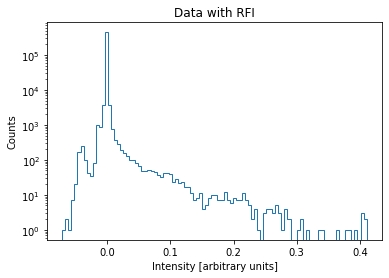

In [8]:
#plt.hist(freq_chn, bins='auto', histtype='step')
plt.hist(flat, bins=100, histtype='step') 
plt.yscale('log', nonposy='clip')
plt.ylabel('Counts')
plt.xlabel('Intensity [arbitrary units]')
plt.title('Data with RFI')
plt.show()
plt.close()

### RFI Data without values around 0

In [9]:
#Remove intensity values between -0.03 and 0.03
NoZero_flat = [x for x in flat if (x < -0.03) | (x > 0.03)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


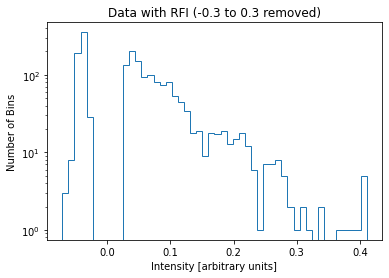

In [10]:
#Plot a histogram
plt.hist(NoZero_flat, bins=50, histtype='step') 
plt.yscale('log', nonposy='clip')
plt.ylabel('Number of Bins')
plt.xlabel('Intensity [arbitrary units]')
plt.title('Data with RFI (-0.3 to 0.3 removed)')
plt.show()
plt.close()

### RFI Cleaned Data

In [11]:
#Load in the RFI clened data and transform it
a2 = psrchive.Archive_load('/srv/storage_11/galc/UBB/jtremblay/20220913/added_clean/B0355+54_added.ar')
a2.tscrunch()
a2.dedisperse()
a2.pscrunch()
a2.remove_baseline()
data2 = a2.get_data()
print("data shape: " + str(data2.shape))

data shape: (1, 1, 5120, 1024)


In [12]:
freq_mhz_clean_table = a2.get_frequency_table()
freq_mhz_clean = freq_mhz_clean_table[0]
print(freq_mhz_clean)
print(np.shape(freq_mhz_clean))

[1290.478 1291.748 1293.017 ... 6001.731 6002.463 6003.196]
(5120,)


In [13]:
#Select the frequency channel to plot
all_freq_chn2 = data2[0,0,:]
single_chn2 = all_freq_chn2[30][20:920]
print(np.shape(single_chn2))

(900,)


In [14]:
#Now loop and create an array with all values
freq_chn2 = []
for i in range(0,512):
    freq_chn2.append(all_freq_chn2[i][20:920])
    
print(np.shape(freq_chn2))

(512, 900)


In [15]:
#Flatten the list so that all values go into a single list
flat2 = [item for sublist in freq_chn2 for item in sublist]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


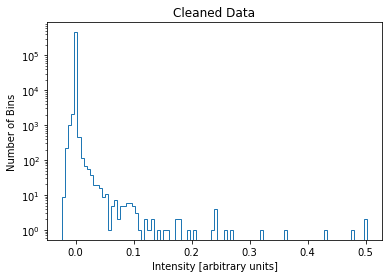

<function matplotlib.pyplot.close(fig=None)>

In [16]:
#plt.hist(freq_chn, bins='auto', histtype='step')
plt.hist(flat2, bins=100, histtype='step') 
plt.yscale('log', nonposy='clip')
plt.ylabel('Number of Bins')
plt.xlabel('Intensity [arbitrary units]')
plt.title('Cleaned Data')
plt.show()
plt.close

### RFI Cleaned Data without values around 0

In [17]:
#Remove intensity values between -0.03 and 0.03
clean_flat2 = [x for x in flat2 if (x < -0.03) | (x > 0.03)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


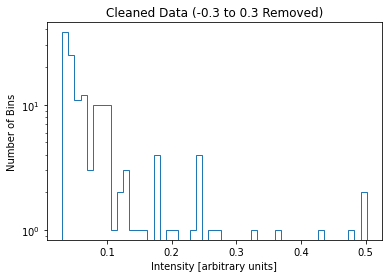

In [18]:
plt.hist(clean_flat2, bins=50, histtype='step') 
plt.yscale('log', nonposy='clip')
plt.ylabel('Number of Bins')
plt.xlabel('Intensity [arbitrary units]')
plt.title('Cleaned Data (-0.3 to 0.3 Removed)')
plt.show()
plt.close()

### Average the frequency (RFI Data)

In [19]:
#Select the frequency channel to plot
all_freq_chn3 = data[0,0,:]
single_chn3 = all_freq_chn[30][20:920]
print(np.shape(single_chn))

#Now loop and create an array with all values
freq_chn3 = []
for i in range(0,4608):
    freq_chn3.append(all_freq_chn3[i][20:920])
    
print(np.shape(freq_chn3))

(900,)
(4608, 900)


In [20]:
#Create a list and average every channel
avg_chn = []
for i in range(0,4608):
    avg_chn.append(np.median(freq_chn3[i]))
#Create a range of frequencies     
freq_list = np.array(range(0,4608,1))

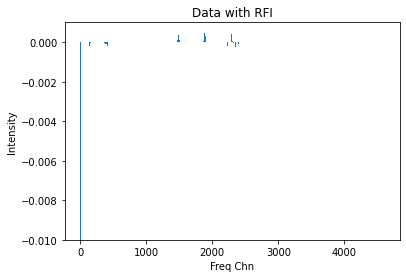

In [21]:
#Create a bar plot
plt.bar(freq_list, avg_chn)
plt.xlabel('Freq Chn')
plt.ylabel('Intensity')
plt.title('Data with RFI')
plt.ylim(-0.010,0.0010)
plt.show()

### Statistics per frequency (RFI Data)

In [22]:
#Select the frequency channel to plot
all_freq_chn_RFI = data[0,0,:]
print(len(all_freq_chn_RFI ))

#Create a range of frequencies     
freq_list_RFI = np.array(range(0,4608,1))

#Create a range of zeros for the data that is removed.
buckets = [np.nan] * 130

##Select only off-pulse channels
freq_chn_RFI = []
for i in range(0,4608): #4608
    freq_chn_RFI.append(np.concatenate((all_freq_chn_RFI[i][:790], buckets, all_freq_chn_RFI[i][920:])))
    #freq_chn_RFI.append(all_freq_chn_RFI[i][20:920])
print(len(freq_chn_RFI))

4608
4608


In [23]:
#Create lists
median_chn_RFI = []
mean_chn_RFI = []
std_chn_RFI = []
sum_chn_RFI = []
kurtosis_chn_RFI = []

for i in range(0,4608): #4608
    #Calculate median for every channel
    median_chn_RFI.append(np.median(all_freq_chn_RFI[i]))
    #Calculate mean for every channel
    mean_chn_RFI.append(np.mean(all_freq_chn_RFI[i]))
    #Calculate standard deviation for every channel
    std_chn_RFI.append(np.std(all_freq_chn_RFI[i]))
    #Calculate sum for every channel
    sum_chn_RFI.append(np.sum(all_freq_chn_RFI[i]))
    #Calculate kurtosis for every channel
    kurtosis_chn_RFI.append(stats.kurtosis(all_freq_chn_RFI[i]))

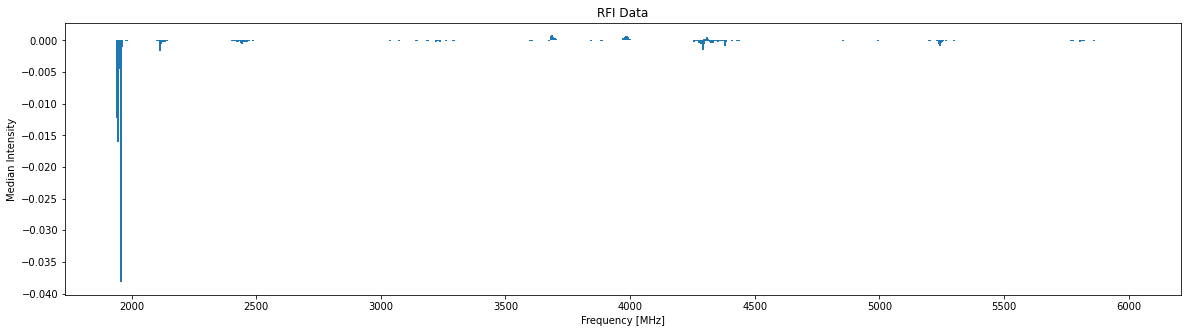

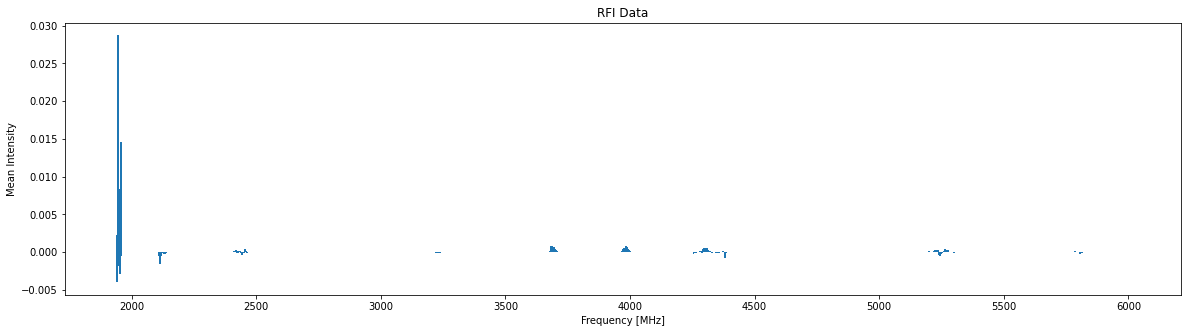

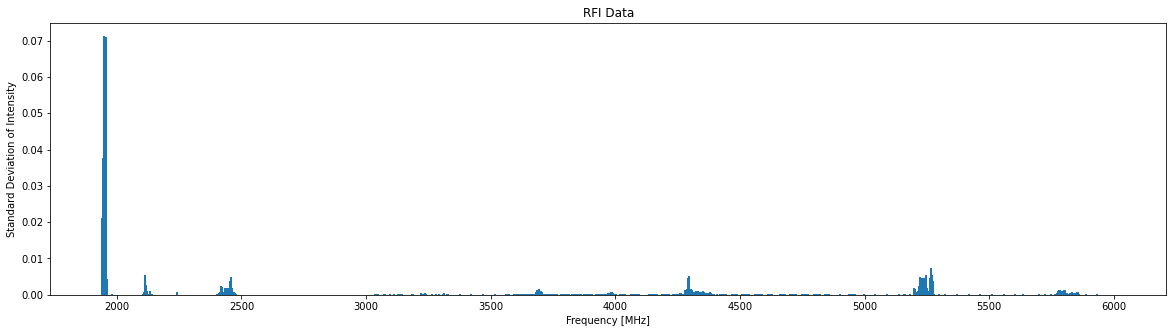

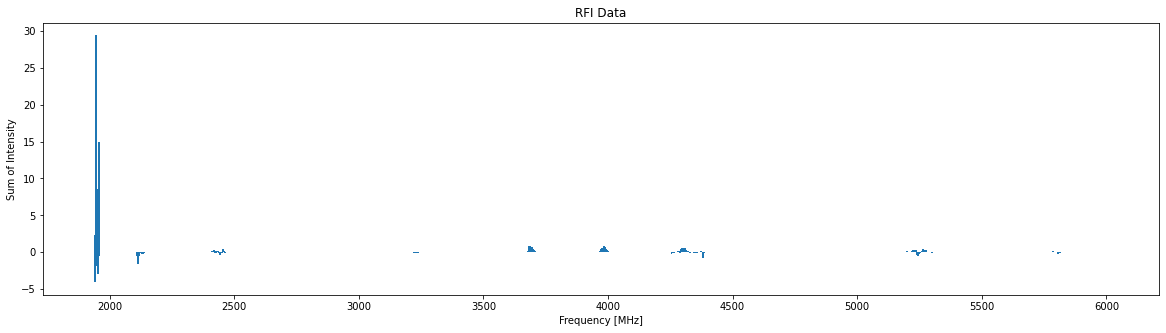

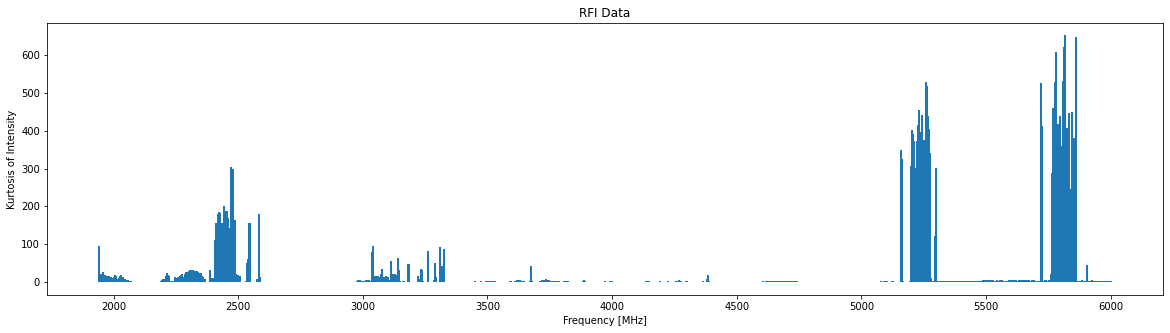

In [24]:
#Create a bar plot
plt.figure(figsize=(20,5))
#plt.bar(freq_list_RFI, median_chn_RFI, width=8)
plt.bar(freq_mhz_RFI, median_chn_RFI, width=8)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Median Intensity')
plt.title('RFI Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
#plt.bar(freq_list_RFI, mean_chn_RFI, width=8)
plt.bar(freq_mhz_RFI, mean_chn_RFI, width=8)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Mean Intensity')
plt.title('RFI Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
#plt.bar(freq_list_RFI, std_chn_RFI, width=8)
plt.bar(freq_mhz_RFI, std_chn_RFI, width=8)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Standard Deviation of Intensity')
plt.title('RFI Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
#plt.bar(freq_list_RFI, sum_chn_RFI, width=8)
plt.bar(freq_mhz_RFI, sum_chn_RFI, width=8)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Sum of Intensity')
plt.title('RFI Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
#plt.bar(freq_mhz_RFI, kurtosis_chn_RFI, width=8)
plt.bar(freq_mhz_RFI, kurtosis_chn_RFI, width=8)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Kurtosis of Intensity')
plt.title('RFI Data')
#plt.yscale('log')
plt.show()
plt.close()

### Statistics per frequency (RFI-Clean Data)

In [25]:
#Select the frequency channel to plot
all_freq_chn4 = data2[0,0,:]

##Select only off-pulse channels
freq_chn4 = []
for i in range(0,5120): #4608
    freq_chn4.append(np.concatenate((all_freq_chn4[i][:790], buckets, all_freq_chn4[i][920:])))
    #freq_chn4.append(all_freq_chn4[i][20:920])
print(len(freq_chn4))

5120


In [26]:
#Create lists
median_chn2 = []
mean_chn = []
std_chn = []
sum_chn = []
kurtosis_chn = []

for i in range(0,5120): #4608
    #Calculate median for every channel
    median_chn2.append(np.nanmedian(freq_chn4[i]))
    #Calculate mean for every channel
    mean_chn.append(np.nanmean(freq_chn4[i]))
    #Calculate standard deviation for every channel
    std_chn.append(np.nanstd(freq_chn4[i]))
    #Calculate sum for every channel
    sum_chn.append(np.nansum(freq_chn4[i]))
    #Calculate kurtosis for every channel
    kurtosis_chn.append(stats.kurtosis(freq_chn4[i], nan_policy='omit'))

In [27]:
#Create a range of frequencies     
freq_list2 = np.array(range(0,5120,1))

In [28]:
#Make all these arrays absolute values
#median_chn2 = np.abs(median_chn2)
#mean_chn = np.abs(mean_chn)
#std_chn = np.abs(std_chn)
#sum_chn = np.abs(std_chn)

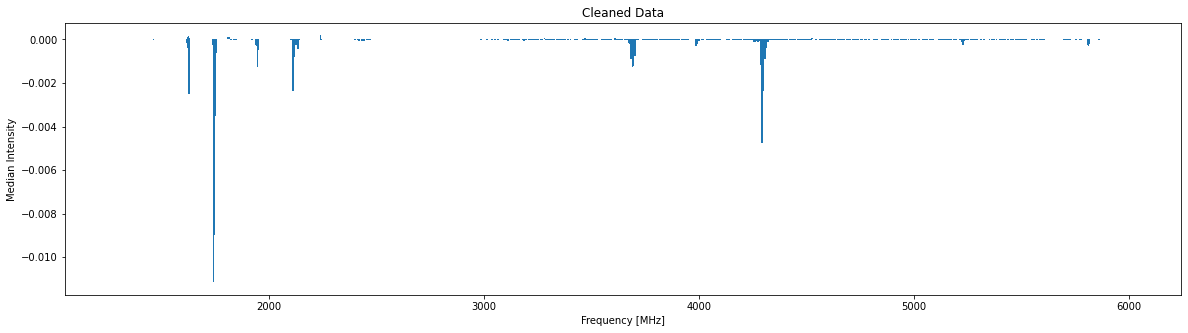

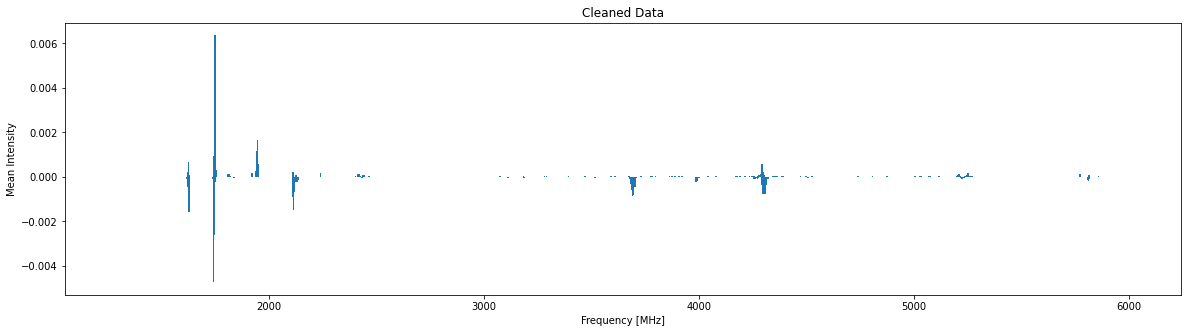

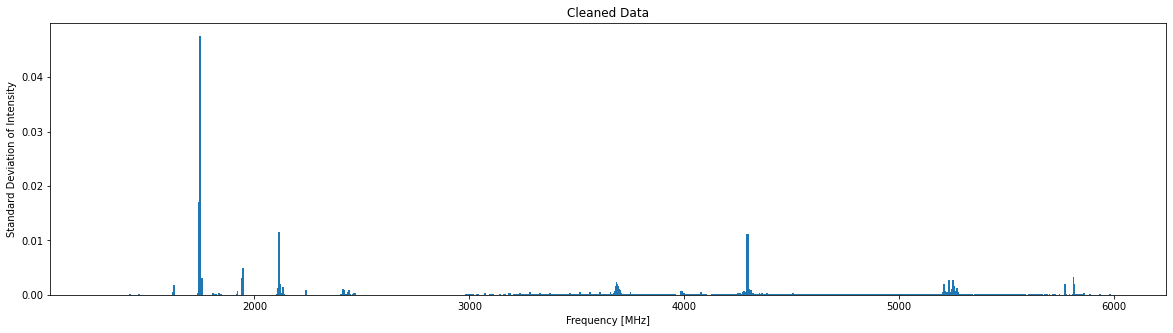

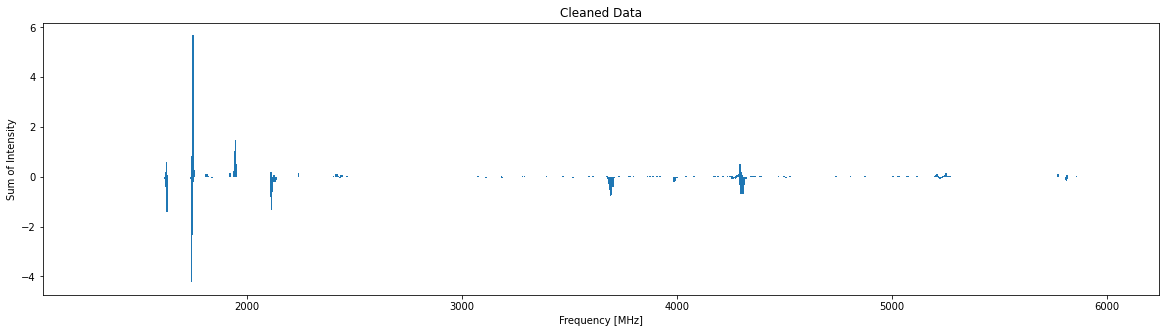

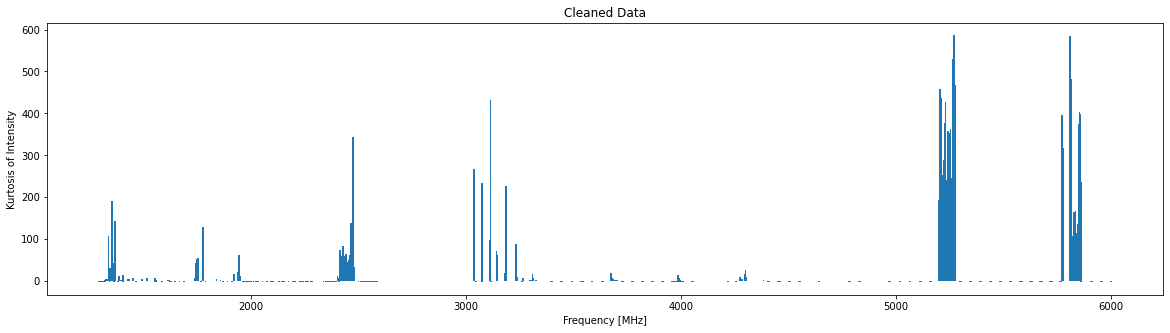

In [29]:
#Create a bar plot
plt.figure(figsize=(20,5))
#plt.bar(freq_list2, median_chn2, width=8)
plt.bar(freq_mhz_clean, median_chn2, width=8)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Median Intensity')
plt.title('Cleaned Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
#plt.bar(freq_list2, mean_chn, width=8)
plt.bar(freq_mhz_clean, mean_chn, width=8)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Mean Intensity')
plt.title('Cleaned Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
#plt.bar(freq_list2, std_chn, width=8)
plt.bar(freq_mhz_clean, std_chn, width=8)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Standard Deviation of Intensity')
plt.title('Cleaned Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
#plt.bar(freq_list2, sum_chn, width=8)
plt.bar(freq_mhz_clean, sum_chn, width=8)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Sum of Intensity')
plt.title('Cleaned Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
#plt.bar(freq_list2, kurtosis_chn, width=8)
plt.bar(freq_mhz_clean, kurtosis_chn, width=8)
plt.xlabel('Frequency [MHz]')
plt.ylabel('Kurtosis of Intensity')
plt.title('Cleaned Data')
#plt.yscale('log')
plt.show()
plt.close()

### Statistics per frequency combined

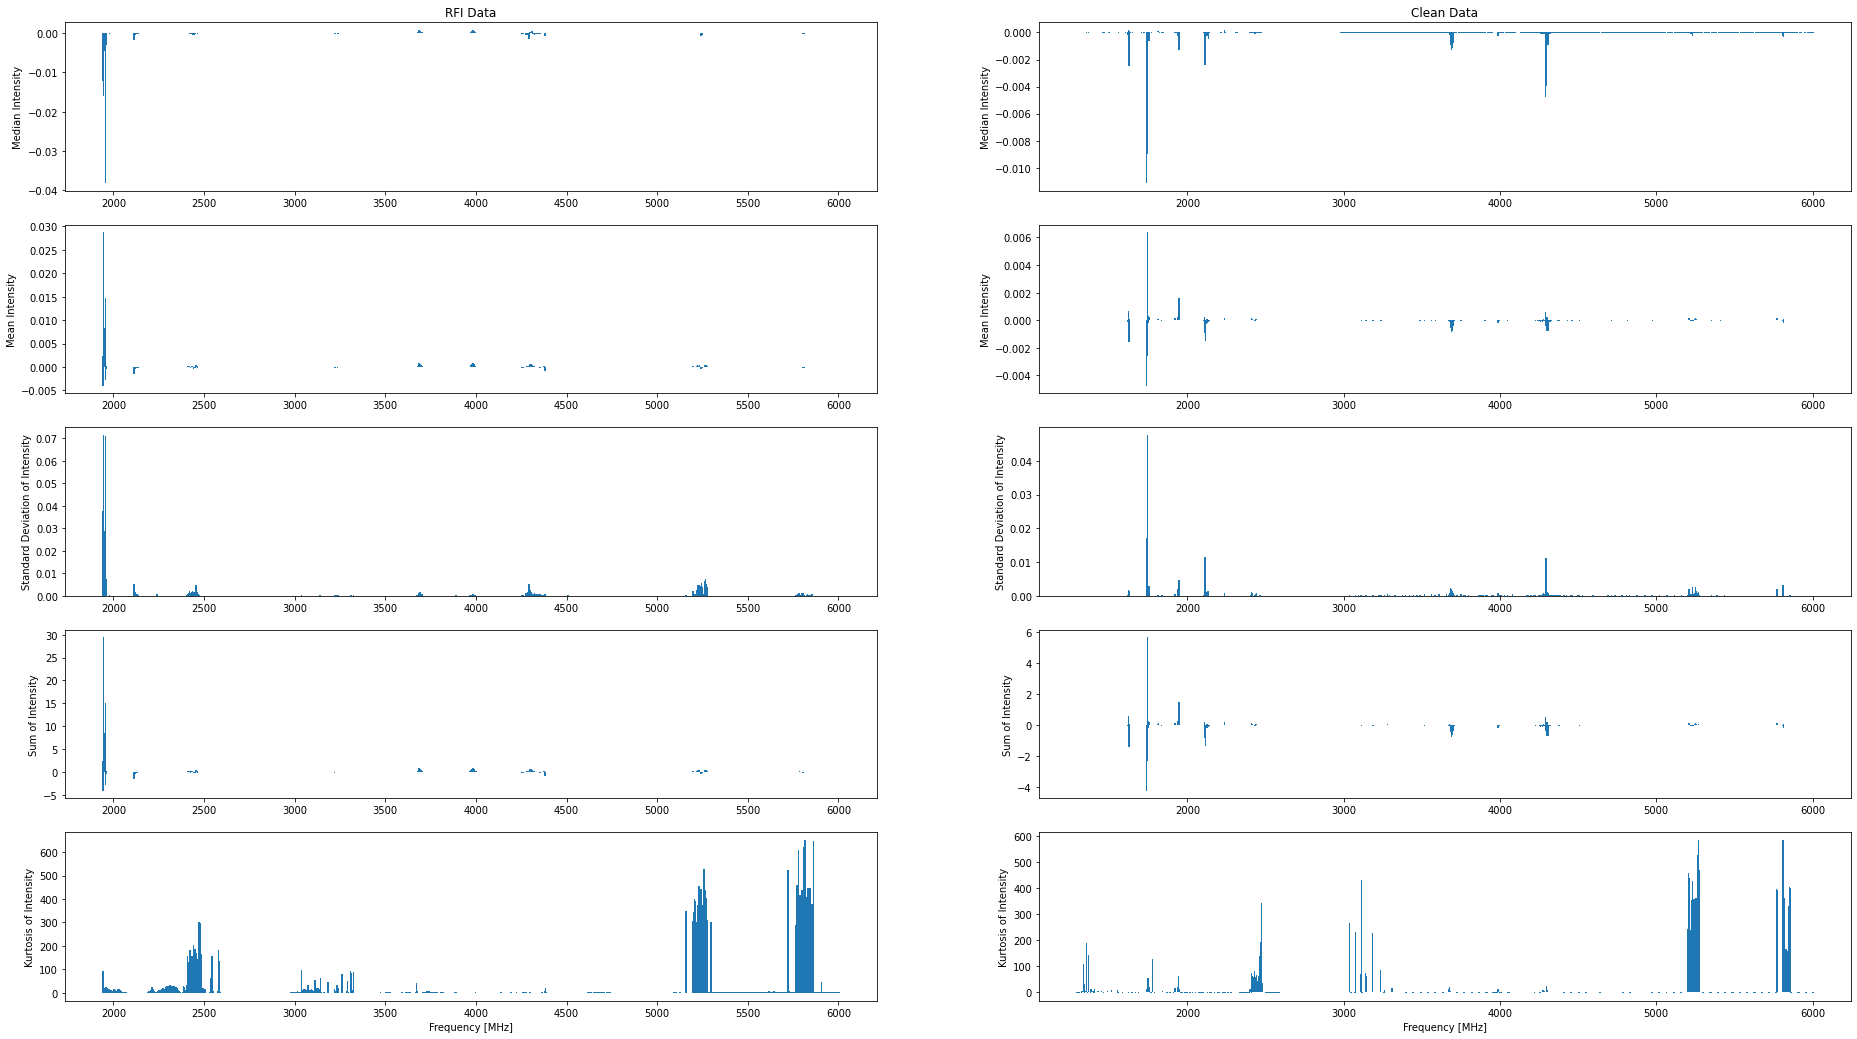

In [30]:
fig, axes = plt.subplots(5,2,figsize=(32,18))

#ax2 = axs[0, 0].secondary_xaxis("top", f)
#ax2 = axs[0, 1].secondary_xaxis("top", f)
#ax2.set_xlim(axs[0, 0].get_xlim())
#ax2.set_xlim(axs[0, 1].get_xlim())
#ax2.set_xticklabels(tick_function(freq_list2))
#ax2.set_xlabel("Frequency Channel [MHz]")

#ax2[0, 0].set_xlim(axs.get_xlim())
#ax2[0, 0].set_xticklabels(tick_function(freq_list2))
#ax2[0, 0].set_xlabel("Frequency Channel [MHz]")

#axes[0, 0].bar(freq_list_RFI, median_chn_RFI, width=8)
axes[0, 0].bar(freq_mhz_RFI, median_chn_RFI, width=8)
axes[0, 0].set_title('RFI Data')
axes[0, 0].set_ylabel('Median Intensity')
#axes[1, 0].bar(freq_list_RFI, mean_chn_RFI, width=8)
axes[1, 0].bar(freq_mhz_RFI, mean_chn_RFI, width=8)
axes[1, 0].set_ylabel('Mean Intensity')
#axes[2, 0].bar(freq_list_RFI, std_chn_RFI, width=8)
axes[2, 0].bar(freq_mhz_RFI, std_chn_RFI, width=8)
axes[2, 0].set_ylabel('Standard Deviation of Intensity')
#axes[3, 0].bar(freq_list_RFI, sum_chn_RFI, width=8)
axes[3, 0].bar(freq_mhz_RFI, sum_chn_RFI, width=8)
axes[3, 0].set_ylabel('Sum of Intensity')
#axes[4, 0].bar(freq_list_RFI, kurtosis_chn_RFI, width=8)
axes[4, 0].bar(freq_mhz_RFI, kurtosis_chn_RFI, width=8)
axes[4, 0].set_ylabel('Kurtosis of Intensity')
axes[4, 0].set_xlabel('Frequency [MHz]')

#axes[0, 1].bar(freq_list2, median_chn2, width=8)
axes[0, 1].bar(freq_mhz_clean, median_chn2, width=8)
axes[0, 1].set_title('Clean Data')
axes[0, 1].set_ylabel('Median Intensity')
#axes[1, 1].bar(freq_list2, mean_chn, width=8)
axes[1, 1].bar(freq_mhz_clean, mean_chn, width=8)
axes[1, 1].set_ylabel('Mean Intensity')
#axes[2, 1].bar(freq_list2, std_chn, width=8)
axes[2, 1].bar(freq_mhz_clean, std_chn, width=8)
axes[2, 1].set_ylabel('Standard Deviation of Intensity')
#axes[3, 1].bar(freq_list2, sum_chn, width=8)
axes[3, 1].bar(freq_mhz_clean, sum_chn, width=8)
axes[3, 1].set_ylabel('Sum of Intensity')
#axes[4, 1].bar(freq_list2, kurtosis_chn, width=8)
axes[4, 1].bar(freq_mhz_clean, kurtosis_chn, width=8)
axes[4, 1].set_ylabel('Kurtosis of Intensity')
axes[4, 1].set_xlabel('Frequency [MHz]')  
plt.show()

Plot the RFI and clean on the same plot.

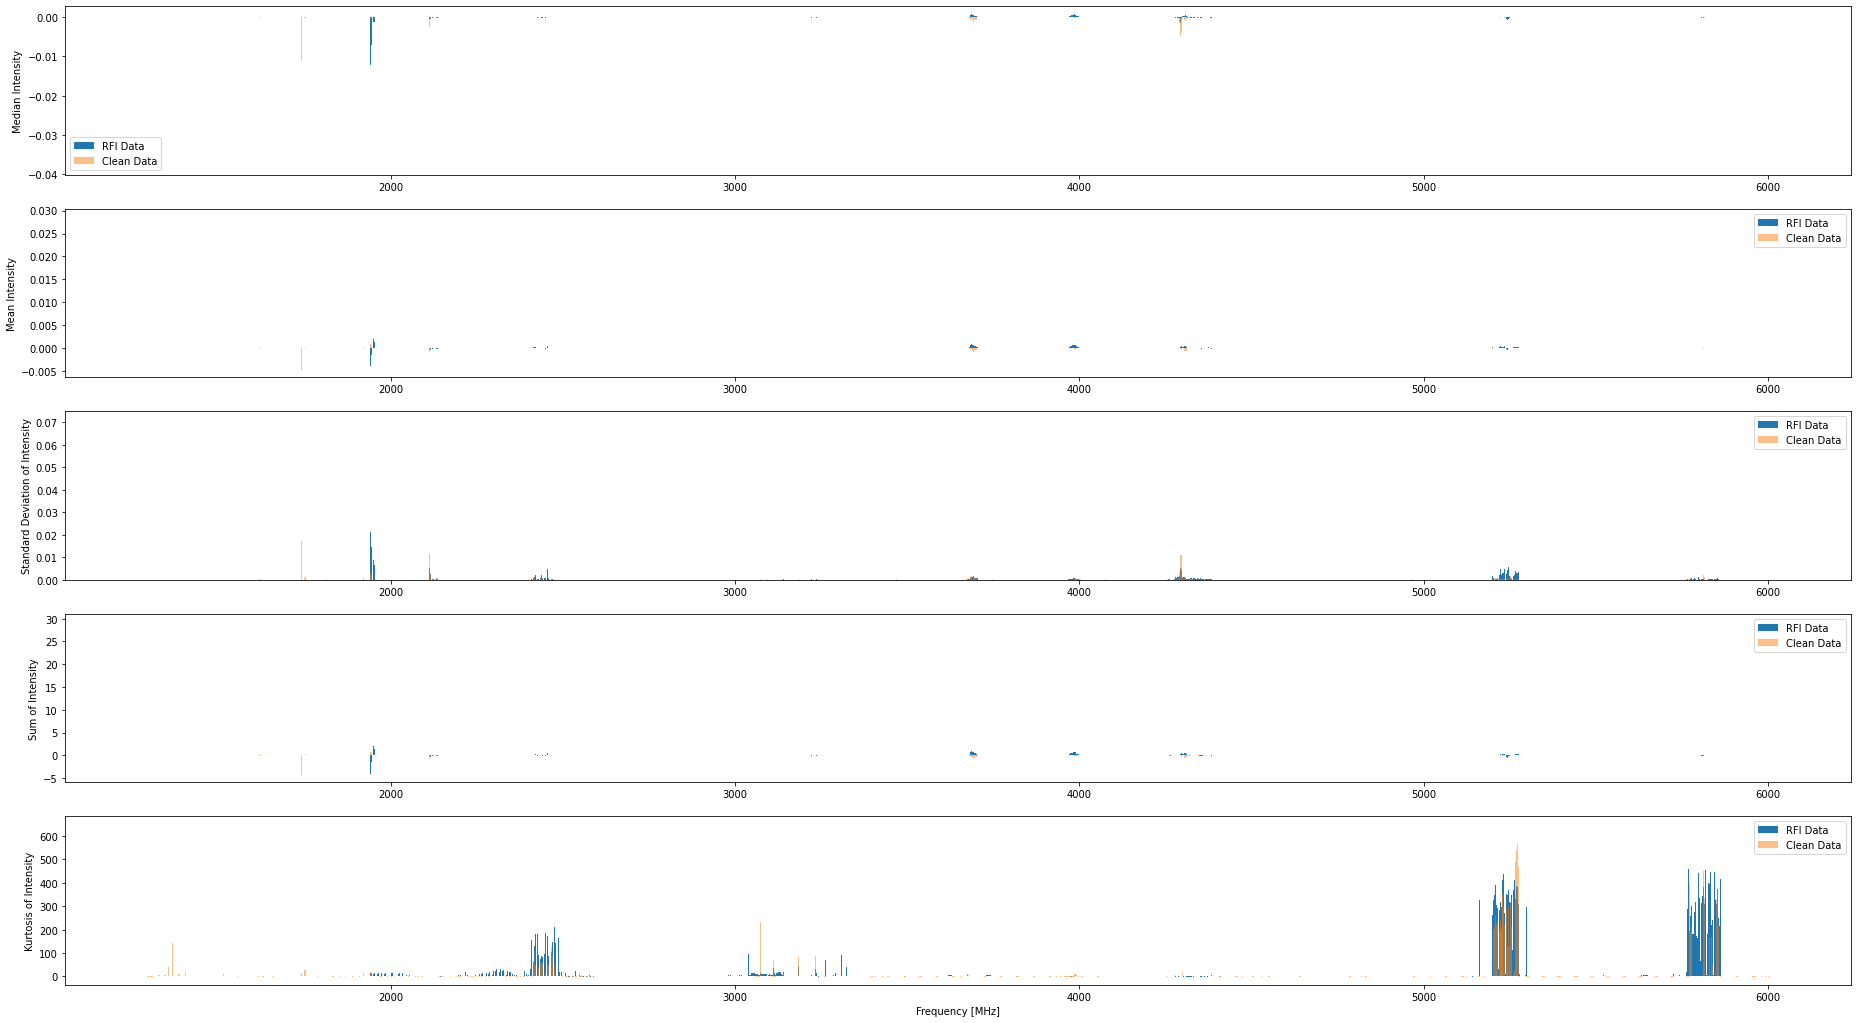

In [31]:
fig, axs = plt.subplots(5, 1, figsize=(32,18))
axs[0].bar(freq_mhz_RFI, median_chn_RFI, label='RFI Data', alpha=1)
axs[0].set_ylabel('Median Intensity')
axs[1].bar(freq_mhz_RFI, mean_chn_RFI, label='RFI Data', alpha=1)
axs[1].set_ylabel('Mean Intensity')
axs[2].bar(freq_mhz_RFI, std_chn_RFI, label='RFI Data', alpha=1)
axs[2].set_ylabel('Standard Deviation of Intensity')
axs[3].bar(freq_mhz_RFI, sum_chn_RFI, label='RFI Data', alpha=1)
axs[3].set_ylabel('Sum of Intensity')
axs[4].bar(freq_mhz_RFI, kurtosis_chn_RFI, label='RFI Data', alpha=1)
axs[4].set_ylabel('Kurtosis of Intensity')
axs[4].set_xlabel('Frequency [MHz]')

axs[0].bar(freq_mhz_clean, median_chn2, label='Clean Data', alpha=0.5)
axs[1].bar(freq_mhz_clean, mean_chn, label='Clean Data', alpha=0.5)
axs[2].bar(freq_mhz_clean, std_chn, label='Clean Data', alpha=0.5)
axs[3].bar(freq_mhz_clean, sum_chn, label='Clean Data', alpha=0.5)
axs[4].bar(freq_mhz_clean, kurtosis_chn, label='Clean Data', alpha=0.5)
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[4].legend()
plt.show()

### Statistics per bin (RFI Data)

In [32]:
off_pulse_list_RFI = []

#Select only off-pulse channels
for i in range(0,4608):
    off_pulse_list_RFI.append(np.concatenate((all_freq_chn_RFI[i][:790], buckets, all_freq_chn_RFI[i][920:])))
    #off_pulse_list_RFI.append(off_pulse[i][:])
    
#Transpose the original array
bin_list_RFI = np.transpose(off_pulse_list_RFI)

print(len(bin_list_RFI))

1024


In [33]:
#Create lists
mean_bin_RFI = []
median_bin_RFI = []
std_bin_RFI = []
sum_bin_RFI = []
kurtosis_bin_RFI = []

for i in range(0,1024):
    #Calculate the mean for each bin
    mean_bin_RFI.append(np.nanmean(bin_list_RFI[i]))
    #Calculate the median for each bin
    median_bin_RFI.append(np.nanmedian(bin_list_RFI[i]))
    #Calculate the standard deviation for each bin
    std_bin_RFI.append(np.nanstd(bin_list_RFI[i]))
    #Calculate the sum for each bin
    sum_bin_RFI.append(np.nansum(bin_list_RFI[i]))
    #Calculate the kurtosis for each bin
    kurtosis_bin_RFI.append(stats.kurtosis(bin_list_RFI[i], nan_policy='omit'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)
/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [34]:
#Create an array to use as the x-axis
bin_nums = np.asarray(range(0,1024))
print(np.shape(bin_nums))

(1024,)


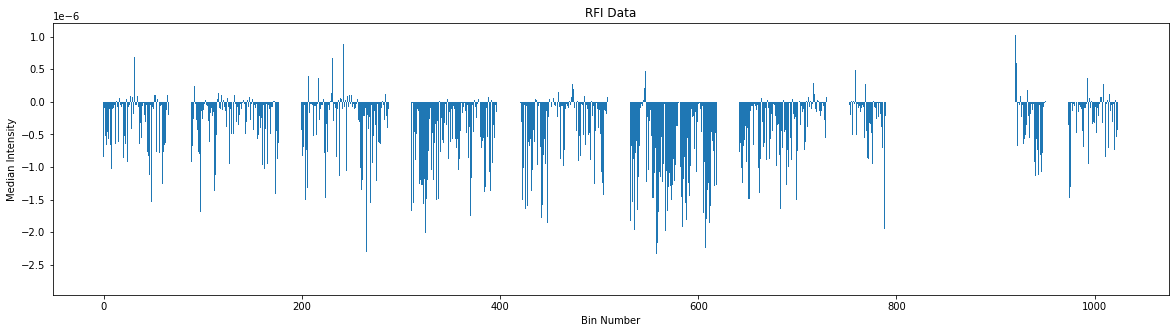

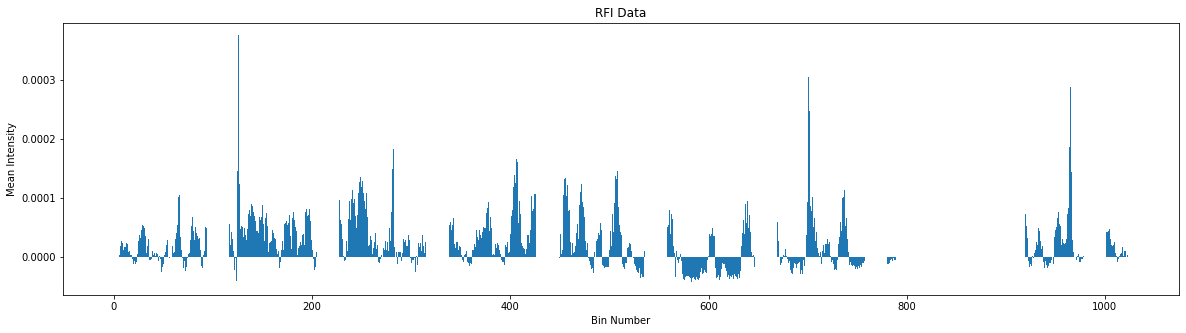

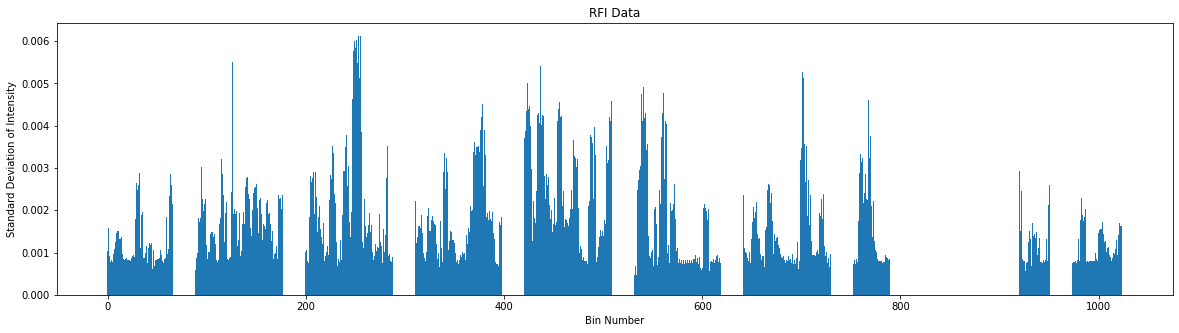

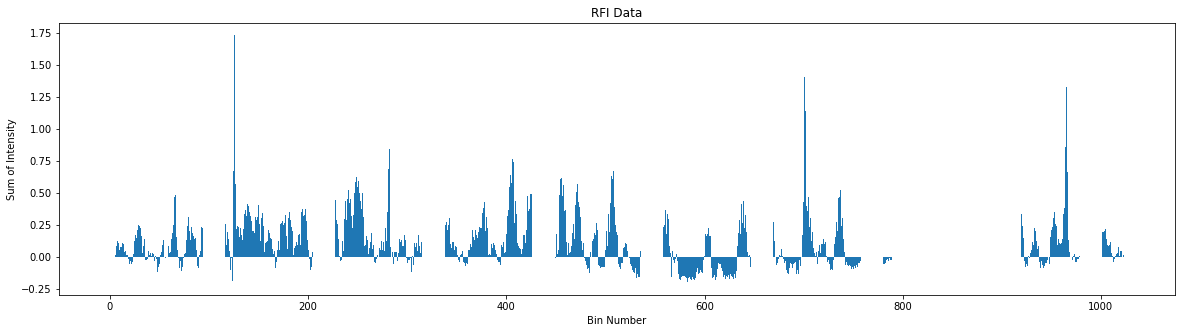

/usr/local/lib/python3.6/dist-packages/numpy/lib/stride_tricks.py:256: UserWarning: Warning: converting a masked element to nan.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


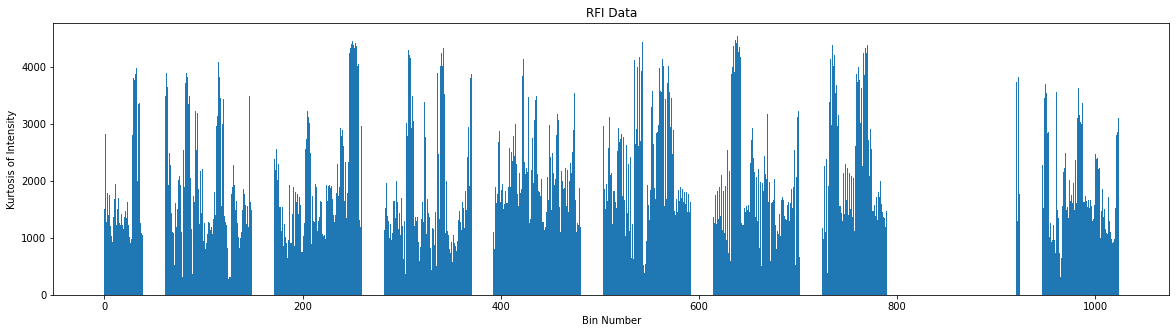

In [35]:
#Create a bar plot
plt.figure(figsize=(20,5))
plt.bar(bin_nums, median_bin_RFI)
plt.xlabel('Bin Number')
plt.ylabel('Median Intensity')
plt.title('RFI Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
plt.bar(bin_nums, mean_bin_RFI)
plt.xlabel('Bin Number')
plt.ylabel('Mean Intensity')
plt.title('RFI Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
plt.bar(bin_nums, std_bin_RFI)
plt.xlabel('Bin Number')
plt.ylabel('Standard Deviation of Intensity')
plt.title('RFI Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
plt.bar(bin_nums, sum_bin_RFI)
plt.xlabel('Bin Number')
plt.ylabel('Sum of Intensity')
plt.title('RFI Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
plt.bar(bin_nums, kurtosis_bin_RFI) #Value of 0 is normal distribution
plt.xlabel('Bin Number')
plt.ylabel('Kurtosis of Intensity')
plt.title('RFI Data')
#plt.yscale('log')
plt.show()
plt.close()

### Statistics per bin (RFI-Clean Data)

In [36]:
#Select the frequency channel to plot
all_freq_chn5 = data2[0,0,:]
print(np.shape(all_freq_chn5))

off_pulse_list = []
#Select only off-pulse channels
for i in range(0,4608):
    off_pulse_list.append(np.concatenate((all_freq_chn_RFI[i][:790], buckets, all_freq_chn_RFI[i][920:])))
    #off_pulse_list.append(all_freq_chn5[i][20:920])
    
#Transpose the original array
bin_list = np.transpose(off_pulse_list)
print(len(bin_list))

(5120, 1024)
1024


In [37]:
#Create lists
mean_bin = []
median_bin = []
std_bin = []
sum_bin = []
kurtosis_bin = []

for i in range(0,1024):
    #Calculate the mean for each bin
    mean_bin.append(np.mean(bin_list[i]))
    #Calculate the median for each bin
    median_bin.append(np.median(bin_list[i]))
    #Calculate the standard deviation for each bin
    std_bin.append(np.std(bin_list[i]))
    #Calculate the sum for each bin
    sum_bin.append(np.sum(bin_list[i]))
    #Calculate the kurtosis for each bin
    kurtosis_bin.append(stats.kurtosis(bin_list[i]))

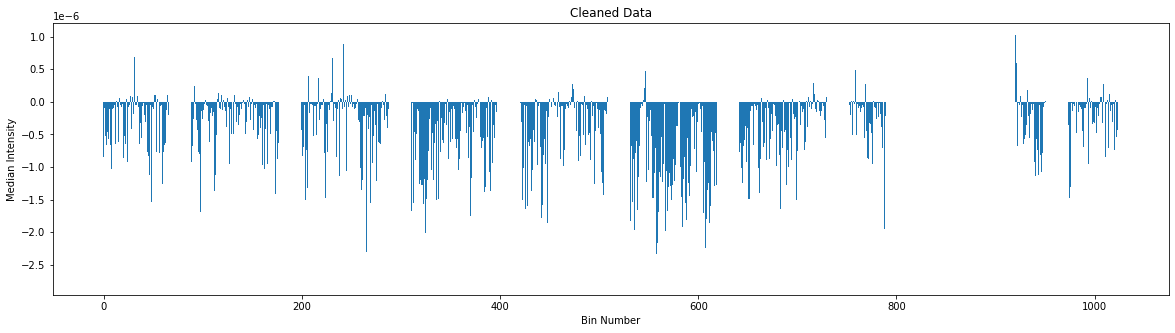

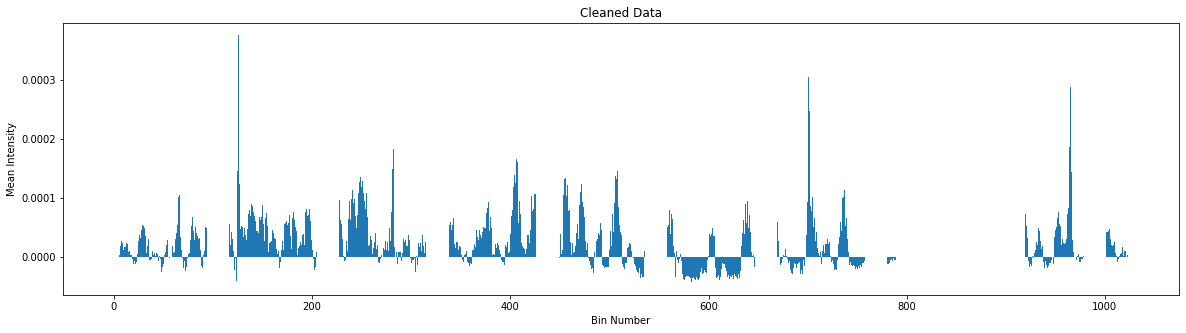

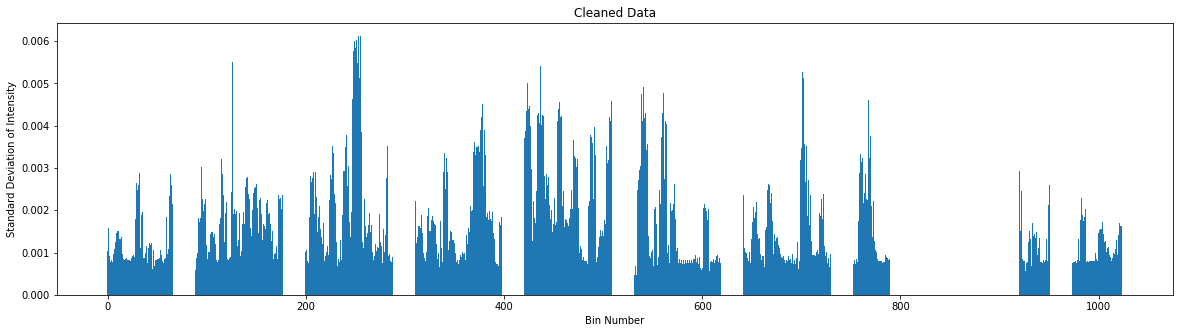

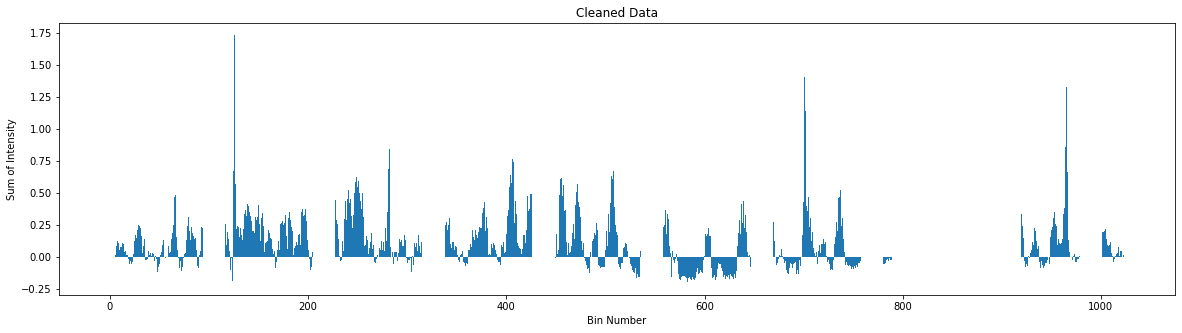

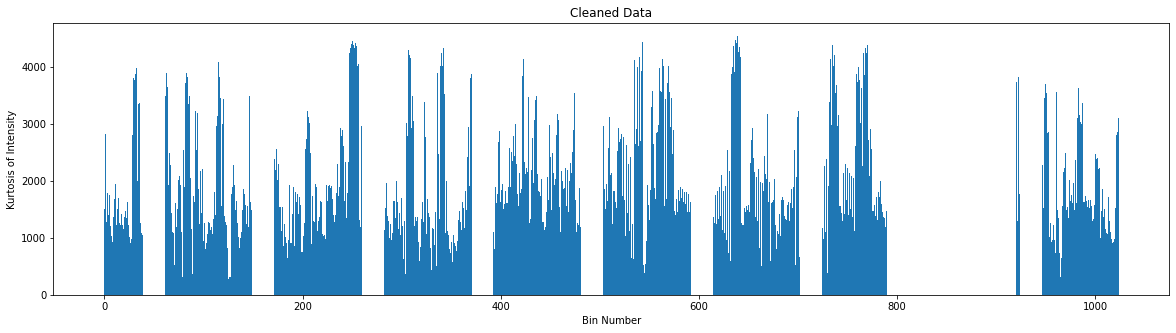

In [38]:
#Create a bar plot
plt.figure(figsize=(20,5))
plt.bar(bin_nums, median_bin)
plt.xlabel('Bin Number')
plt.ylabel('Median Intensity')
plt.title('Cleaned Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
plt.bar(bin_nums, mean_bin)
plt.xlabel('Bin Number')
plt.ylabel('Mean Intensity')
plt.title('Cleaned Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
plt.bar(bin_nums, std_bin)
plt.xlabel('Bin Number')
plt.ylabel('Standard Deviation of Intensity')
plt.title('Cleaned Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
plt.bar(bin_nums, sum_bin)
plt.xlabel('Bin Number')
plt.ylabel('Sum of Intensity')
plt.title('Cleaned Data')
#plt.yscale('log')
plt.show()
plt.close()

#Create a bar plot
plt.figure(figsize=(20,5))
plt.bar(bin_nums, kurtosis_bin) #Value of 0 is normal distribution
plt.xlabel('Bin Number')
plt.ylabel('Kurtosis of Intensity')
plt.title('Cleaned Data')
#plt.yscale('log')
plt.show()
plt.close()

### Statistics per bin combined

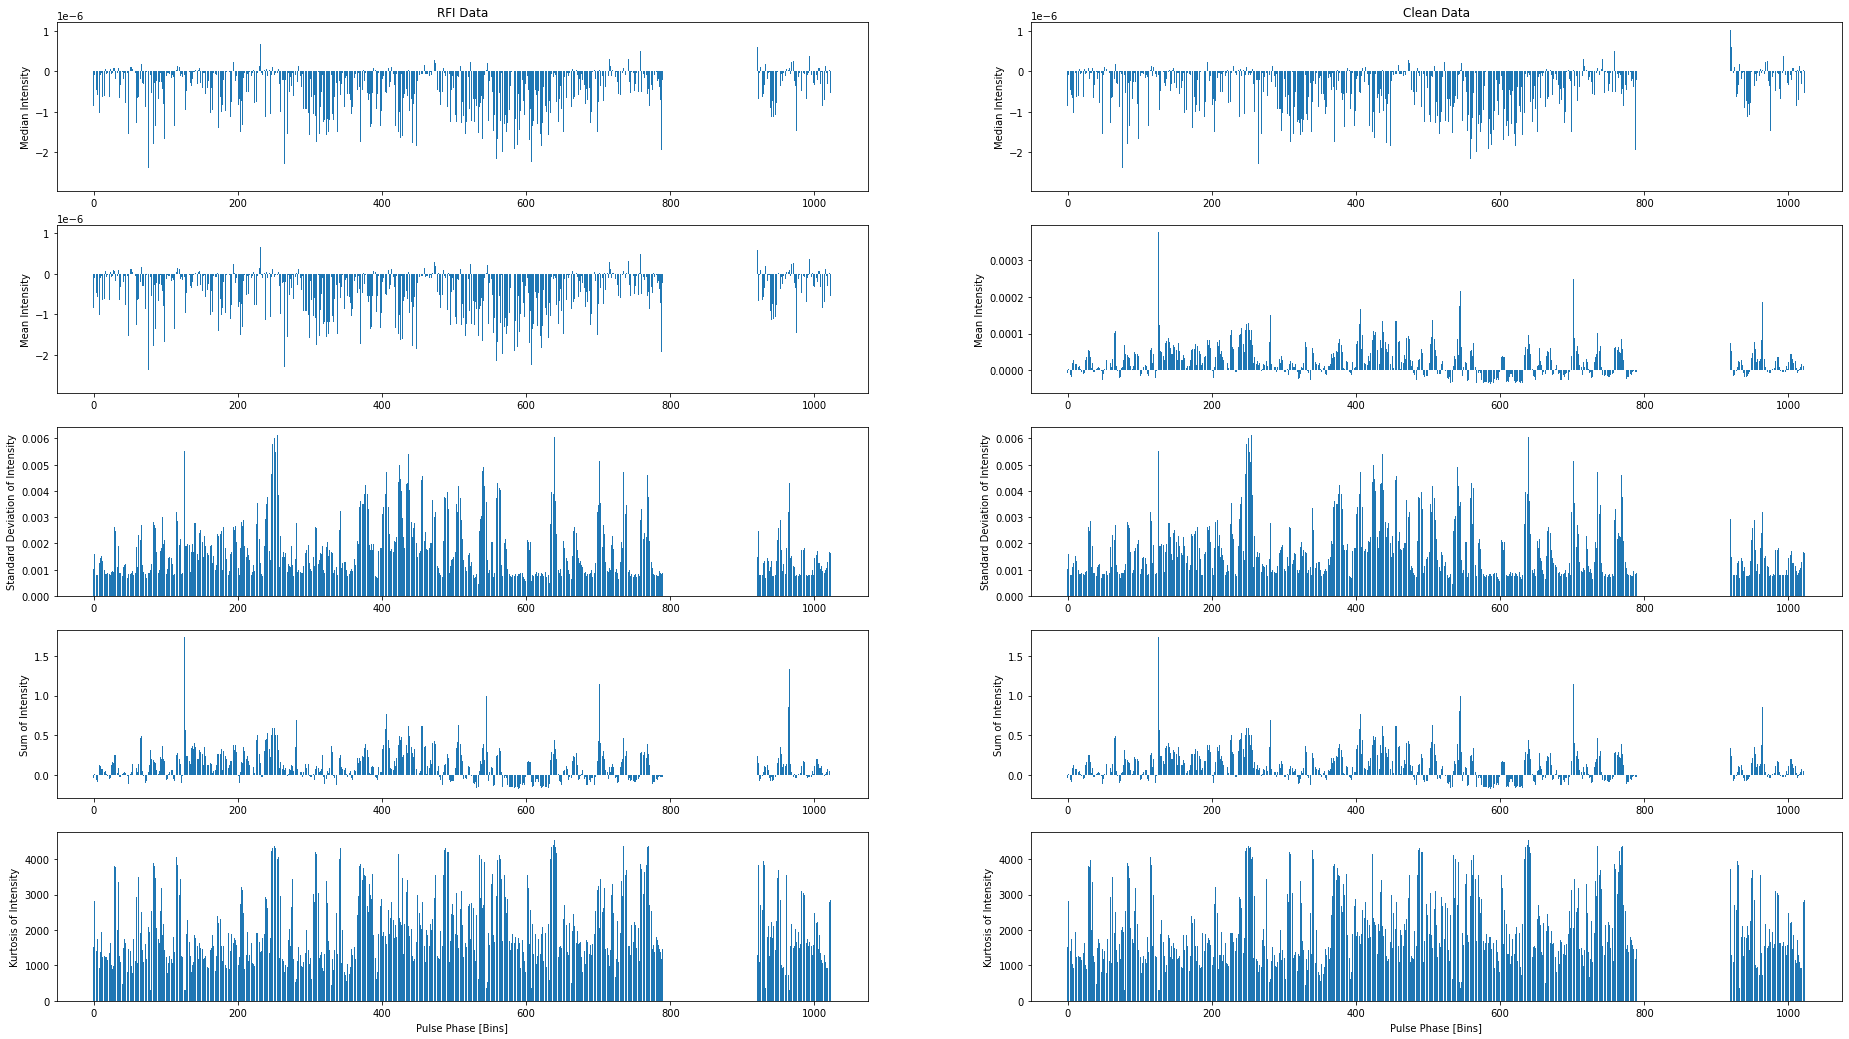

In [39]:
fig, axs = plt.subplots(5, 2, figsize=(32,18))
axs[0, 0].bar(bin_nums, median_bin_RFI)
axs[0, 0].set_title('RFI Data')
axs[0, 0].set_ylabel('Median Intensity')
axs[1, 0].bar(bin_nums, median_bin_RFI)
axs[1, 0].set_ylabel('Mean Intensity')
axs[2, 0].bar(bin_nums, std_bin_RFI)
axs[2, 0].set_ylabel('Standard Deviation of Intensity')
axs[3, 0].bar(bin_nums, sum_bin_RFI)
axs[3, 0].set_ylabel('Sum of Intensity')
axs[4, 0].bar(bin_nums, kurtosis_bin_RFI)
axs[4, 0].set_ylabel('Kurtosis of Intensity')
axs[4, 0].set_xlabel('Pulse Phase [Bins]')

axs[0, 1].bar(bin_nums, median_bin)
axs[0, 1].set_title('Clean Data')
axs[0, 1].set_ylabel('Median Intensity')
axs[1, 1].bar(bin_nums, mean_bin)
axs[1, 1].set_ylabel('Mean Intensity')
axs[2, 1].bar(bin_nums, std_bin)
axs[2, 1].set_ylabel('Standard Deviation of Intensity')
axs[3, 1].bar(bin_nums, sum_bin)
axs[3, 1].set_ylabel('Sum of Intensity')
axs[4, 1].bar(bin_nums, kurtosis_bin)
axs[4, 1].set_ylabel('Kurtosis of Intensity')
axs[4, 1].set_xlabel('Pulse Phase [Bins]')
plt.show()
plt.close()

Plot RFI and clean on same plot

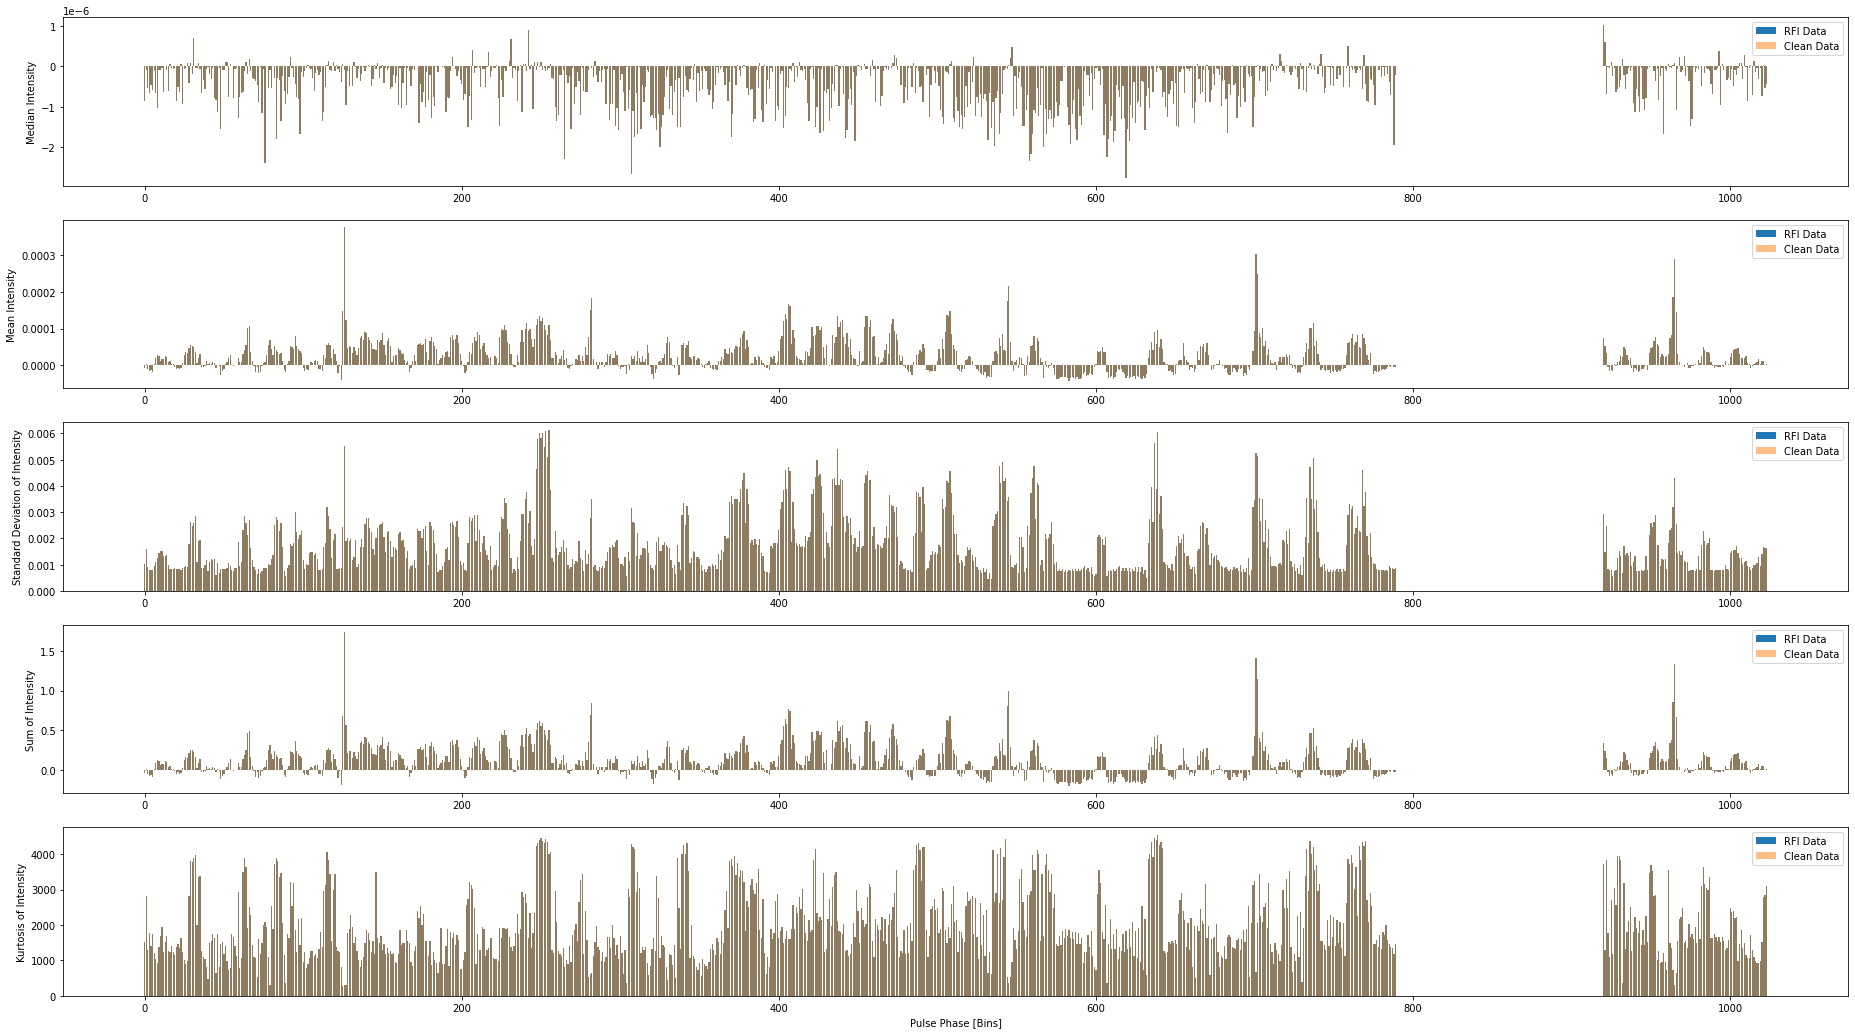

In [40]:
fig, axs = plt.subplots(5, 1, figsize=(32,18))
axs[0].bar(bin_nums, median_bin_RFI, label='RFI Data', alpha=1)
axs[0].set_ylabel('Median Intensity')
axs[1].bar(bin_nums, mean_bin_RFI, label='RFI Data', alpha=1)
axs[1].set_ylabel('Mean Intensity')
axs[2].bar(bin_nums, std_bin_RFI, label='RFI Data', alpha=1)
axs[2].set_ylabel('Standard Deviation of Intensity')
axs[3].bar(bin_nums, sum_bin_RFI, label='RFI Data', alpha=1)
axs[3].set_ylabel('Sum of Intensity')
axs[4].bar(bin_nums, kurtosis_bin_RFI, label='RFI Data', alpha=1)
axs[4].set_ylabel('Kurtosis of Intensity')
axs[4].set_xlabel('Pulse Phase [Bins]')

axs[0].bar(bin_nums, median_bin, label='Clean Data', alpha=0.5)
axs[1].bar(bin_nums, mean_bin, label='Clean Data', alpha=0.5)
axs[2].bar(bin_nums, std_bin, label='Clean Data', alpha=0.5)
axs[3].bar(bin_nums, sum_bin, label='Clean Data', alpha=0.5)
axs[4].bar(bin_nums, kurtosis_bin, label='Clean Data', alpha=0.5)
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[4].legend()
plt.show()
plt.close()